**<font size=5> Module Title: Artificial Intelligence </font>**

**<font size=5> Assessment Title: Individual CA2 </font>**

**<font size=4> Lecturer Name: David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

# Question 1
A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/Awa25/AI-DV_CA2/blob/main/qqimg.png?raw=true", width=500)

## (a) The graph in Fig. 1 is a visualisation of the problem.

### (i) Identify the differences between a graph and a tree
- Definition: A tree is a special type of graph. A tree is an undirected graph in which any two nodes are connected by exactly one path, and there are no cycles. A graph, in contrast, can have any number of paths connecting nodes and can include cycles.
- Nodes and Edges: In a tree, the number of edges is always one less than the number of nodes. In a generic graph, there can be any number of edges.
- Root: Trees typically have a specific node called the "root" from which hierarchical structures descend. Graphs do not have a designated root.
- Path: In a tree, there's exactly one unique path between any two nodes. In a graph, there can be multiple paths, or even none at all, between two nodes.
- Cycles: Trees cannot have cycles, whereas cycles can be present in graphs.

So Fig. 1 is a graph. It has cycles and multiple paths between nodes indicating it is not a tree, trees don't have cycles, and there are unique paths between any two nodes.

### (ii) Explain in detail how the graph is an abstraction of the problem.

### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1.
- Clarity: Visual representations provide a clear picture of the problem, helping in better understanding and interpretation.
- Identifying Possibilities: By looking at the graph, one can immediately see possible routes and paths.
- Problem Solving: Visuals can assist in employing algorithms or heuristics to find solutions.
- Comparing Routes: By visualizing, it becomes easier to compare different routes in terms of their lengths or costs.
- Communication: Visual representations like graphs can be easily shared and discussed among teams, making collaborative problem-solving more efficient.

## (b)Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

In [14]:
# Import necessary libraries
import heapq  # Import the heapq module for heap-based data structures
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs
import networkx as nx  # Import NetworkX, a library for working with networks and graphs
import timeit         # Import the timeit library for measuring code execution time.

In [15]:
# Define the graph as a list of tuples with the given data
data = [
    ("A", "B", 1), ("A", "C", 5), ("A", "H", 2),
    ("B", "A", 1), ("B", "C", 2), ("B", "D", 4),
    ("C", "A", 5), ("C", "B", 2), ("C", "G", 1),
    ("D", "B", 4), ("D", "E", 4), ("D", "F", 7), ("D", "L", 7),
    ("E", "D", 4), ("E", "F", 3), ("E", "W", 6),
    ("F", "D", 7), ("F", "E", 3), ("F", "G", 2),
    ("G", "C", 1), ("G", "F", 2), ("G", "L", 3),
    ("H", "A", 2), ("H", "K", 5), ("H", "J", 9),
    ("J", "H", 9), ("J", "N", 6), ("J", "K", 3),
    ("K", "H", 5), ("K", "J", 3), ("K", "L", 5),
    ("L", "K", 5), ("L", "G", 3), ("L", "D", 7), ("L", "N", 3), ("L", "M", 4), ("L", "W", 8), ("L", "V", 10),
    ("M", "L", 4), ("M", "P", 2), ("M", "Q", 10),
    ("N", "J", 6), ("N", "L", 3), ("N", "P", 4), ("N", "S", 7),
    ("P", "N", 4), ("P", "M", 2), ("P", "R", 5),
    ("Q", "M", 10), ("Q", "W", 4), ("Q", "S", 8),
    ("R", "P", 5), ("R", "T", 3), ("R", "S", 4),
    ("S", "Q", 8), ("S", "R", 4), ("S", "N", 7), ("S", "U", 2), ("S", "V", 6), ("S", "T", 4),
    ("T", "R", 3), ("T", "S", 4), ("T", "U", 1),
    ("U", "T", 1), ("U", "S", 2), ("U", "V", 3),
    ("V", "U", 3), ("V", "S", 6), ("V", "L", 10),
    ("W", "V", 5), ("W", "L", 8), ("W", "Q", 4), ("W", "E", 6)
]

# Initialize an empty dictionary to store the graph
graph = {}

# Iterate over the list of tuples and populate the graph dictionary
for node1, node2, cost in data:
    if node1 not in graph:
        graph[node1] = []
    graph[node1].append((node2, cost))

# Display the graph data
graph

{'A': [('B', 1), ('C', 5), ('H', 2)],
 'B': [('A', 1), ('C', 2), ('D', 4)],
 'C': [('A', 5), ('B', 2), ('G', 1)],
 'D': [('B', 4), ('E', 4), ('F', 7), ('L', 7)],
 'E': [('D', 4), ('F', 3), ('W', 6)],
 'F': [('D', 7), ('E', 3), ('G', 2)],
 'G': [('C', 1), ('F', 2), ('L', 3)],
 'H': [('A', 2), ('K', 5), ('J', 9)],
 'J': [('H', 9), ('N', 6), ('K', 3)],
 'K': [('H', 5), ('J', 3), ('L', 5)],
 'L': [('K', 5), ('G', 3), ('D', 7), ('N', 3), ('M', 4), ('W', 8), ('V', 10)],
 'M': [('L', 4), ('P', 2), ('Q', 10)],
 'N': [('J', 6), ('L', 3), ('P', 4), ('S', 7)],
 'P': [('N', 4), ('M', 2), ('R', 5)],
 'Q': [('M', 10), ('W', 4), ('S', 8)],
 'R': [('P', 5), ('T', 3), ('S', 4)],
 'S': [('Q', 8), ('R', 4), ('N', 7), ('U', 2), ('V', 6), ('T', 4)],
 'T': [('R', 3), ('S', 4), ('U', 1)],
 'U': [('T', 1), ('S', 2), ('V', 3)],
 'V': [('U', 3), ('S', 6), ('L', 10)],
 'W': [('V', 5), ('L', 8), ('Q', 4), ('E', 6)]}

In [16]:
# Fuction to perform Dijkstra's algorithm
def dijkstra(graph, start_node):
    
    # Initialize distances and predecessors for all nodes in the graph
    distances = {node: float("inf") for node in graph}
    predecessors = {node: None for node in graph}
    
    # Set the distance from the start_node to itself as 0
    distances[start_node] = 0
    
    # Create a priority queue for nodes to be explored
    # It stores tuples of (distance, node)
    priority_queue = [(0, start_node)]
    
    # While there are nodes in the priority queue to explore
    while priority_queue:
        
        # Get the node with the shortest distance from the priority queue
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Skip this node if it has already been processed with a shorter distance
        if current_distance > distances[current_node]:
            continue
            
        # Iterate over neighbors of the current node
        for neighbor, weight in graph[current_node]:
            
            # Calculate the total distance to the neighbor through the current node
            distance = current_distance + weight
            
            # If a shorter path to the neighbor is found, update the distance and predecessor
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                
                # Add the neighbor to the priority queue for further exploration
                heapq.heappush(priority_queue, (distance, neighbor))
                
    # Return the final distances and predecessors
    return distances, predecessors

In [17]:
# Fuction to calculate the shortest path 
def shortest_path(graph, start_node, end_node):
    
    # Find the shortest path using Dijkstra's algorithm and get distances and predecessors
    distances, predecessors = dijkstra(graph, start_node)
    
    # Reconstruct the path form end_node to start_node
    path = []
    while end_node is not None:
        path.insert(0, end_node) # Insert the current node at the beginning of the path 
        end_node = predecessors[end_node] # Move to the predecessor
        
    # Return the reconstructed path and distances
    return path, distances

# Define the starting and ending nodes for the shortest path
start_node = "A"
end_node = "S"

In [18]:
# Calculate the shortest path and distances
path, distances = shortest_path(graph, start_node, end_node)

# Display the result
path, distances[end_node]

(['A', 'B', 'C', 'G', 'L', 'N', 'S'], 17)

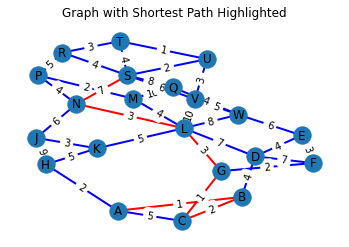

In [23]:
# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges to the graph
for node, connections in graph.items():
    for neighbor, cost in connections:
        G.add_edge(node, neighbor, weight = cost)

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Calculate the shortest path
shortest_path_nodes = path  # Get this from your code
shortest_path_edges = [(shortest_path_nodes[i], shortest_path_nodes[i + 1]) for i in range(len(shortest_path_nodes) - 1)]

# Highlight the shortest path by changing edge color
edge_colors = ['b' if edge not in shortest_path_edges else 'r' for edge in G.edges()]

# Draw the nodes, edges, and labels
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = edge_colors, width = 2)
nx.draw_networkx_labels(G, pos)

# Draw the edge labels
edge_labels = {(node, neighbor): cost for node, neighbor, cost in G.edges(data = 'weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

# Show the graph
plt.axis('off')
plt.title("Graph with Shortest Path Highlighted")
plt.show()

# Question 2
The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.